Import the required libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset from the CSV file:

In [4]:
file_path = "/Users/abhamisaqi/Downloads/Real-Time_Traffic_Incident_Reports.csv"
df = pd.read_csv(file_path)


In [ ]:
Wrangle and clean the data:

In [5]:
# Convert the date columns to datetime objects
df['Published Date'] = pd.to_datetime(df['Published Date'])
df['Status Date'] = pd.to_datetime(df['Status Date'])

# Convert latitude and longitude columns to float
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

# Remove rows with missing values if necessary
df = df.dropna(subset=['Latitude', 'Longitude'])



Analyze and create visualizations:

In [5]:
# Basic statistics
df.describe()

# Count of Issue Reported
issue_counts = df['Issue Reported'].value_counts()
print(issue_counts)


Traffic Hazard                98086
Crash Urgent                  76968
Crash Service                 45499
COLLISION                     30710
TRFC HAZD/ DEBRIS             23555
zSTALLED VEHICLE               8925
LOOSE LIVESTOCK                8623
COLLISION WITH INJURY          7877
Traffic Impediment             6252
COLLISN/ LVNG SCN              5746
Stalled Vehicle                5596
COLLISION/PRIVATE PROPERTY     1314
VEHICLE FIRE                   1157
BLOCKED DRIV/ HWY               711
BOAT ACCIDENT                   124
AUTO/ PED                        99
TRAFFIC FATALITY                 89
ICY ROADWAY                      74
FLEET ACC/ INJURY                40
N / HZRD TRFC VIOL               11
OBSTRUCT HWY                      8
HIGH WATER                        5
FLEET ACC/ FATAL                  3
COLLISN / FTSRA                   1
Name: Issue Reported, dtype: int64


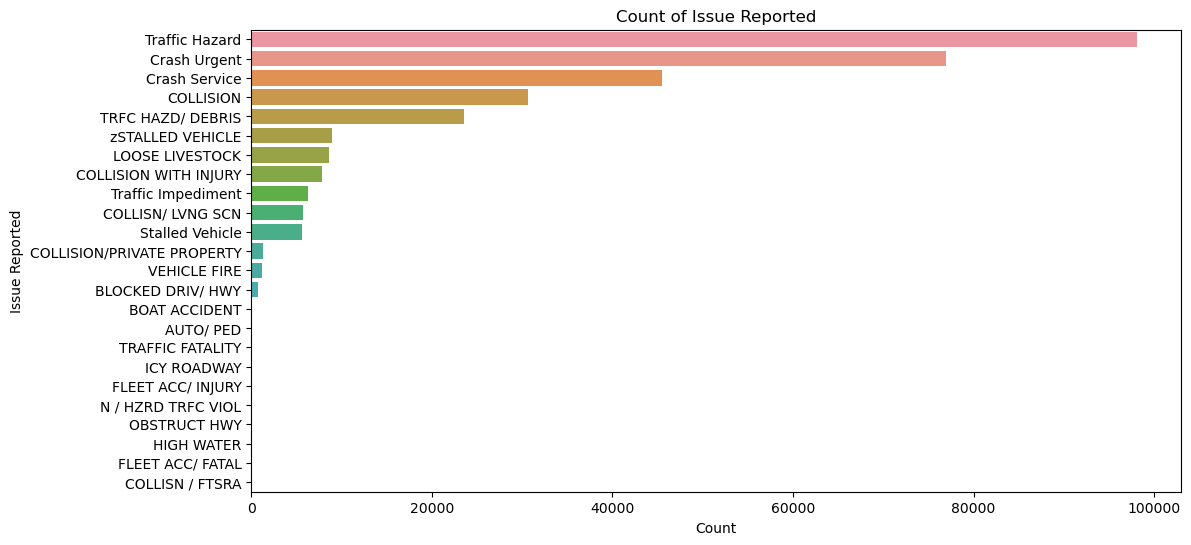

In [6]:

# Visualize the count of Issue Reported
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Issue Reported', order=df['Issue Reported'].value_counts().index)
plt.title('Count of Issue Reported')
plt.xlabel('Count')
plt.ylabel('Issue Reported')
plt.show()

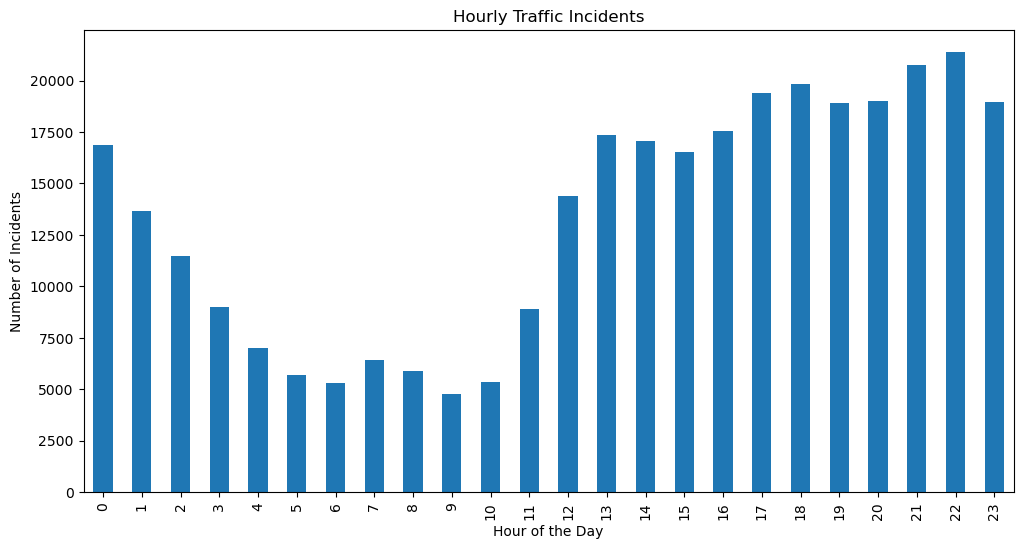

In [9]:

# Analyze incidents by time
df['hour'] = df['Published Date'].dt.hour
hourly_incidents = df.groupby('hour').size()
hourly_incidents.plot(kind='bar', figsize=(12, 6))
plt.title('Hourly Traffic Incidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
!pip install folium

In [10]:
# Assuming the data is already loaded in the `df` DataFrame
coords = df[['Latitude', 'Longitude']].dropna().values

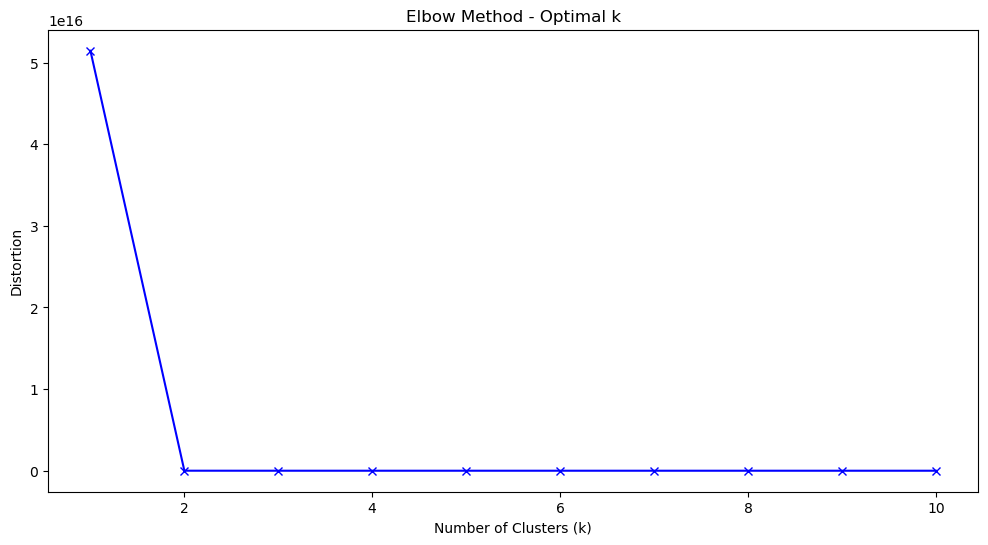

In [12]:
# Elbow Method
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(coords)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method - Optimal k')
plt.show()



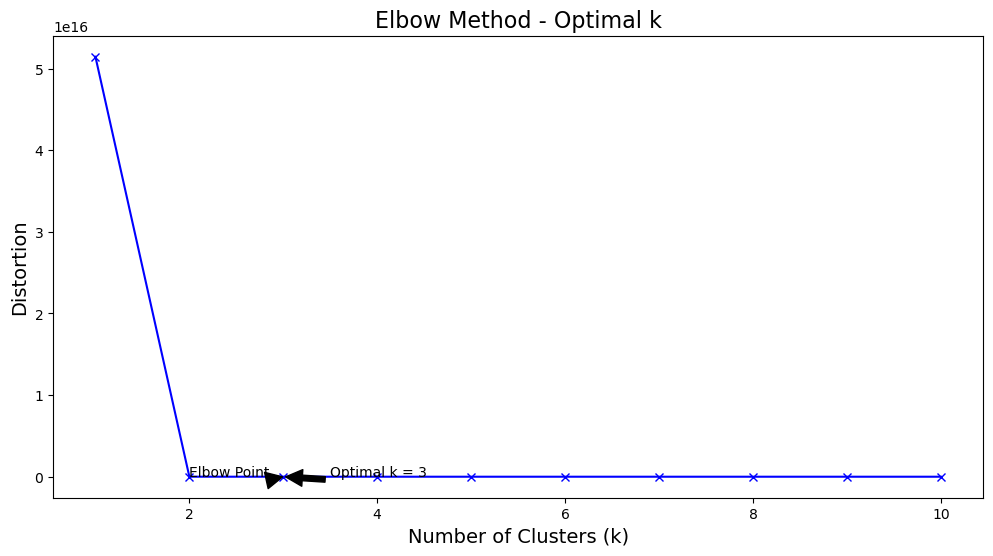

In [22]:
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(coords)
    distortions.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(K, distortions, 'bx-')
ax.set_xlabel('Number of Clusters (k)', fontsize=14)
ax.set_ylabel('Distortion', fontsize=14)
ax.set_title('Elbow Method - Optimal k', fontsize=16)

# Add annotations for elbow point and optimal k value
elbow_point = (3, distortions[2])
ax.annotate('Elbow Point', xy=elbow_point, xytext=(2, 5000),
            arrowprops=dict(facecolor='black', shrink=0.05))
optimal_k = 3
ax.annotate(f'Optimal k = {optimal_k}', xy=(optimal_k, distortions[optimal_k-1]),
            xytext=(optimal_k+0.5, 7000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()





/Users/abhamisaqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


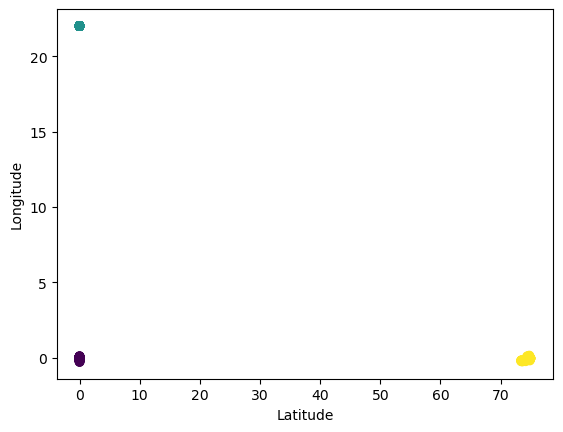

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = "/Users/abhamisaqi/Downloads/Real-Time_Traffic_Incident_Reports.csv"
df = pd.read_csv(file_path, usecols=["Latitude", "Longitude"])

# Drop rows containing NaN values
df = df.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)

# Visualize the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


/Users/abhamisaqi/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


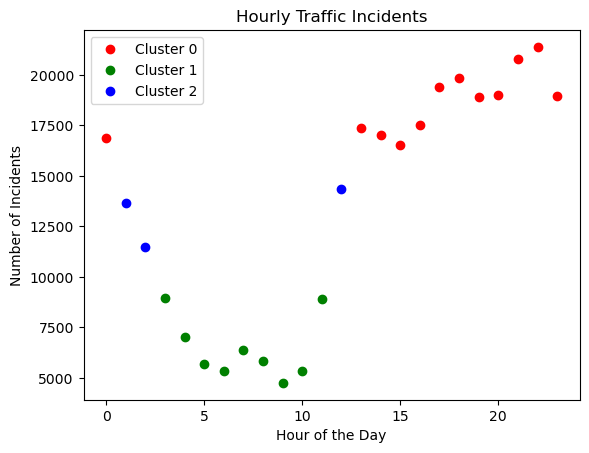

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "/Users/abhamisaqi/Downloads/Real-Time_Traffic_Incident_Reports.csv"
df = pd.read_csv(file_path, parse_dates=['Published Date'])

# Group the incidents by hour of the day
df['hour'] = df['Published Date'].dt.hour
hourly_incidents = df.groupby('hour').size().reset_index(name='counts')

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(hourly_incidents[['counts']])

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_data)

# Add the cluster labels to the dataframe
hourly_incidents['cluster'] = kmeans.labels_

# Visualize the clusters
colors = ['red', 'green', 'blue']
for i in range(3):
    subset = hourly_incidents[hourly_incidents['cluster'] == i]
    plt.plot(subset['hour'], subset['counts'], marker='o', linestyle='', color=colors[i], label='Cluster ' + str(i))
plt.legend()
plt.title('Hourly Traffic Incidents')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Incidents')
plt.show()
